# Teplykh Roman
## Students

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from copy import deepcopy

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Import data

In [4]:
path = '../data/student/'
files = !ls ../data/student/

In [5]:
files

['student-mat.csv', 'student-merge.R', 'student-por.csv', 'student.txt']

In [6]:
student_math = pd.read_csv(files[0], sep=';')
student_port = pd.read_csv(files[2], sep=';')

# Data review

In [7]:
student_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
student_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [9]:
students = student_math

## Encoding attributes

## Here are several functions for fast and convenient data encode

In [10]:
mjob = {
    "at_home": 0, 
    "health": 1, 
    "services": 2, 
    "teacher": 3, 
    "other": 4
}

fjob = {
    "at_home": 0, 
    "health": 1, 
    "services": 2, 
    "teacher": 3, 
    "other": 4
}
reason = {
    "home": 0, 
    "reputation": 1, 
    "course": 2, 
    "other": 3
}
guardian = {
    "mother": 0, 
    "father": 1, 
    "other": 2
}

hard_features = {
    'Mjob': mjob,
    'Fjob': fjob,
    'reason': reason,
    'guardian': guardian
}

prepaire_data = {
    'age': lambda x: x,
    'sex': lambda x: 0 if x == 'M' else 1,
    'nursery': lambda x: 0 if x == 'no' else 1,
    'school': lambda x: 0 if x == 'GP' else 1,
    'address': lambda x: 0 if x == 'U' else 1,
    'Pstatus': lambda x: 0 if x == 'A' else 1,
    'famsize': lambda x: 0 if x == 'LE3' else 1,
    'schoolsup': lambda x: 0 if x == 'no' else 1,
    'famsup': lambda x: 0 if x == 'no' else 1,
    'activities': lambda x: 0 if x == 'no' else 1,
    'paid': lambda x: 0 if x == 'no' else 1,
    'internet': lambda x: 0 if x == 'no' else 1,
    'higher': lambda x: 0 if x == 'no' else 1,
    'romantic': lambda x: 0 if x == 'no' else 1,
}

In [11]:
def replace(attr, grades = [(1, 10)]):
    
    def swap(x):

#         print(x, attr, grades)
        
        if attr in prepaire_data:
            return prepaire_data[attr](x)

        elif attr in hard_features:
            return hard_features[attr][x]

        elif attr in ['G1', 'G2', 'G3']:
            for grade, bound in grades:
                if x >= bound:
                    return grade
            return 0
    
        else:
            return x
    
    return swap

In [12]:
def prepocess_data(dataframe, **kwargs):
    'dataframe - pandas data frame with data'
    
    _dataframe = deepcopy(dataframe)
    
    if 'grades' not in kwargs:
        kwargs['grades'] = [(1, 10)]
    
    for attr in dataframe.columns:
        func = replace(attr, kwargs['grades'])
        _dataframe[attr] = _dataframe[attr].apply(func)
    
    return _dataframe

In [13]:
students_prepaired = prepocess_data(students)

In [14]:
students_prepaired.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,1,0,4,4,0,3,...,4,3,4,1,1,3,6,0,0,0
1,0,1,17,0,1,1,1,1,0,4,...,5,3,3,1,1,3,4,0,0,0
2,0,1,15,0,0,1,1,1,0,4,...,4,3,2,2,3,3,10,0,0,1
3,0,1,15,0,1,1,4,2,1,2,...,3,2,2,1,1,5,2,1,1,1
4,0,1,16,0,1,1,3,3,4,4,...,4,3,2,1,2,5,4,0,1,1


# Data analysis

## Attributes correlation

In [15]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [16]:
students_prepaired.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.526582,16.696203,0.222785,0.711392,0.896203,2.749367,2.521519,2.475949,3.025316,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,0.640506,0.630380,0.670886
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.427185,1.213029,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,0.480461,0.483314,0.470487
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,17.000000,0.000000,1.000000,1.000000,3.000000,2.000000,3.000000,4.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.000000,4.000000,3.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,1.000000,1.000000,1.000000


## As we can see, table not convenient way for analysing data. At this heatmap we convenient way for analysis correlations 

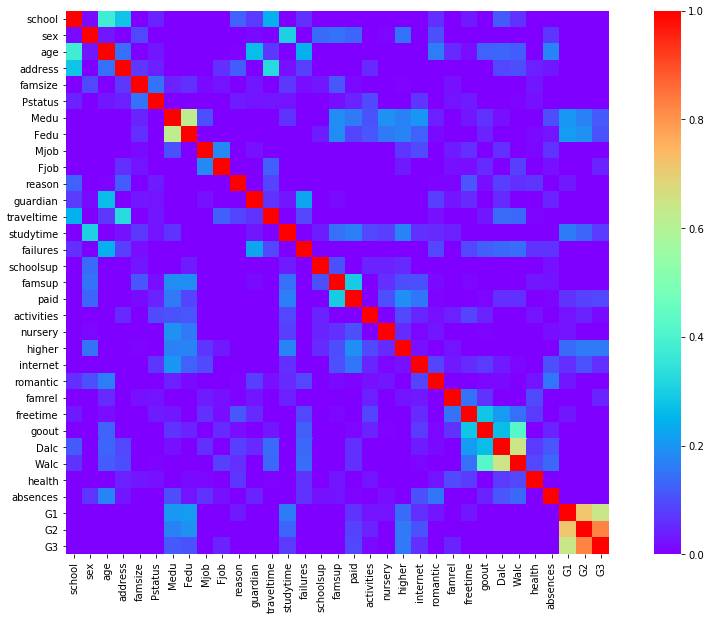

In [17]:
plt.figure(figsize=(16, 10))
seaborn.heatmap(students_prepaired.corr(), vmin=0, vmax=1, square=True, cmap='rainbow')

plt.show()

## Here, we see, that most of features are uncorrelated and in this case, we should use all of them for fitting our models

In [18]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, Normalizer

In [19]:
scallers = [('Normalizer', Normalizer()), 
            ('MinMax', MinMaxScaler(feature_range=(-1, 1))), 
            ('AbsMax', MaxAbsScaler())] 

## Maybe, if we normalize values, then correlation will be increased. 

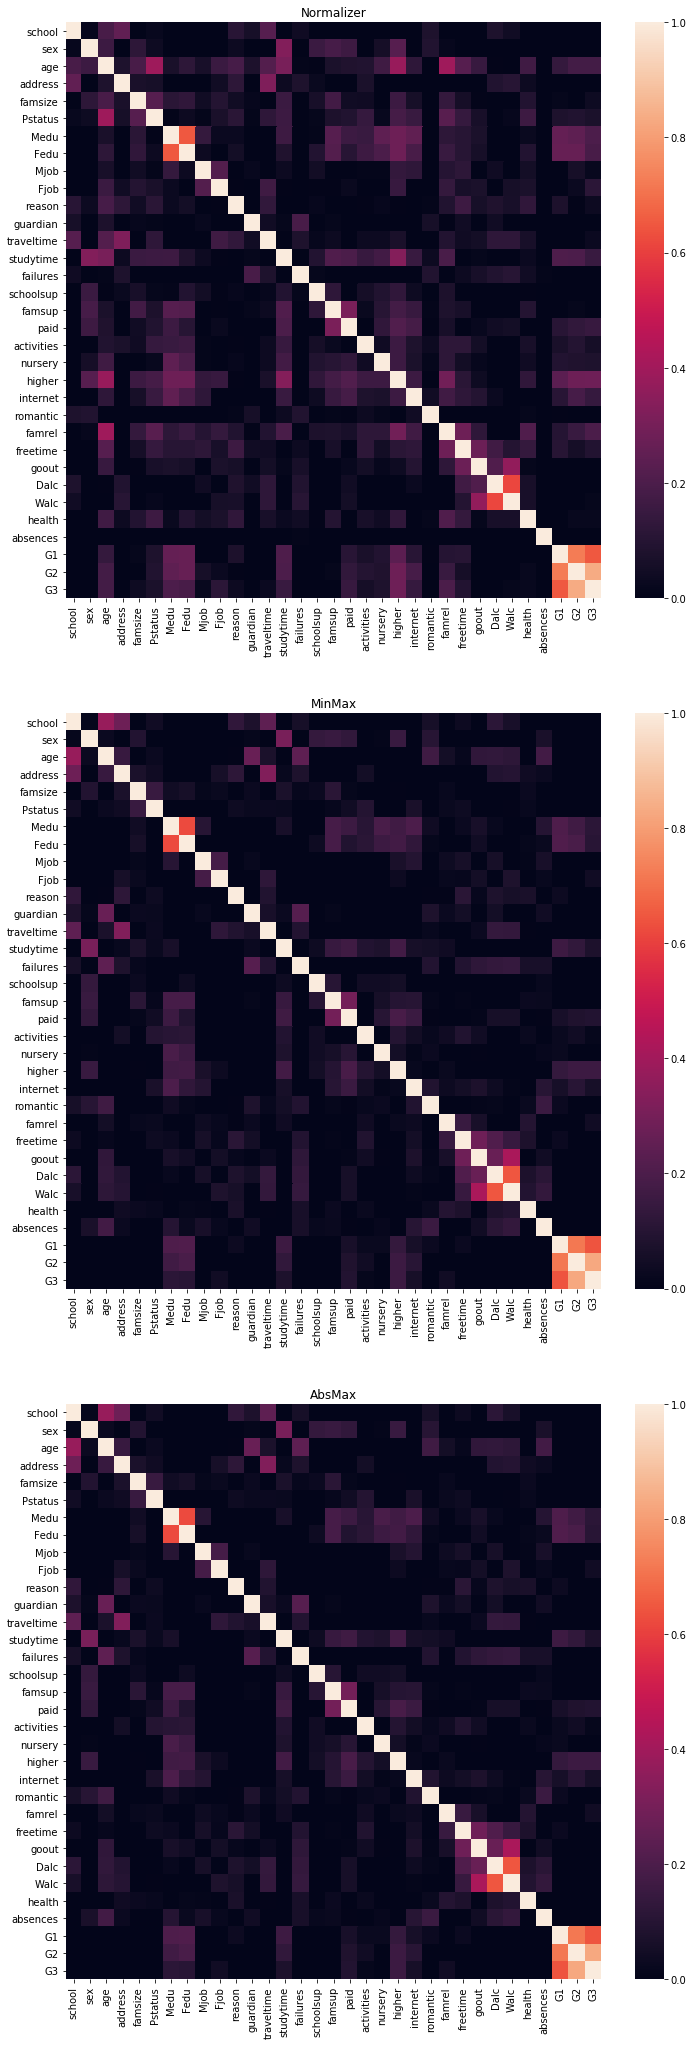

In [20]:
fig, axes = plt.subplots(ncols=1, nrows=3)
fig.set_figheight(36)
fig.set_figwidth(12)

for axes, (scaller_name, scaller_func) in zip(axes, scallers):   
    
    _pd = deepcopy(students_prepaired)
    
    _pd.loc[:, :] = scaller_func.fit_transform(_pd.get_values())
    seaborn.heatmap(_pd.corr(), vmin=0, vmax=1, ax=axes) 
    axes.set_title(scaller_name)
    
plt.show()

## No, as before, all attributes are uncorrelated

# Model selection, fitting and testing

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, ParameterGrid, train_test_split
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, roc_auc_score, classification
from sklearn.model_selection import cross_val_score

In [22]:
X = students_prepaired.get_values()[:, :-1]
Y = students_prepaired.get_values()[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, shuffle=True)

### Grid parameters for searching their best combination

In [23]:
decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': list(range(45, 65, 5)),
    'max_depth': list(range(4, 9, 1)),  
}

In [24]:
kneighbors_params = {
    'n_neighbors': list(range(13, 35, 2)),
    'weights': ['uniform', 'distance'],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [25]:
svm_params = {
    'gamma': [2e-9, 2e-7, 2e-5],
    'tol': [1e-2, 1e-4],
    'kernel': ['rbf'], 
    'degree': list(range(1, 3)),
    'decision_function_shape' : ['ovo', 'ovr'],
    'probability': [True]
}

## Several function for further analysis and comfortable work

### Function for prepairing, fitting and testing classification models

In [26]:
def pretty_print(classification_report, classificator_name):
    
    data = dict()
    data['id'] = range(1, len(classification_report[0]) + 1, 1)
    data['precision_' + classificator_name] = classification_report[0]
    data['recall_' + classificator_name] = classification_report[1]
    data['fscore_' + classificator_name] = classification_report[2]
    
    return pd.DataFrame(data=data)

In [27]:
def classifier_name(estimator):
    return str(estimator).split('.')[-1][:-2]

In [28]:
def binary_classifier_prepaire(estimator, grid_params, estimator_name, X, Y):
    
    grid_search = GridSearchCV(estimator(), grid_params, n_jobs=4, iid=True)
    grid_search.fit(X, Y)
    
    best_estimator = grid_search.best_estimator_
    best_estimator_params = grid_search.best_params_
    
    roc_auc_train = roc_auc_score(Y, best_estimator.predict(X))
    roc_auc_test = roc_auc_score(Y, best_estimator.predict(X))
    accuracy_train = accuracy_score(Y, best_estimator.predict(X))
    accuracy_test = accuracy_score(Y, best_estimator.predict(X))
    
    report_test = pretty_print(classification.precision_recall_fscore_support(Y, 
                                                                              best_estimator.predict(X)), 
                               estimator_name)
    
    estimator_weight = grid_search.best_score_
    
    return {
        'estimator': best_estimator, 
        'estimator_params': best_estimator_params, 
        'roc_auc_train': roc_auc_train, 
        'roc_auc_test': roc_auc_test, 
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'estimator_weight': estimator_weight,
        'report_test': report_test
    }

In [29]:
def multiclass_classifier_prepaire(estimator, grid_params, estimator_name, X, Y):
    
    grid_search = GridSearchCV(estimator(), grid_params, n_jobs=4, iid=True)
    grid_search.fit(X, Y)
    
    best_estimator = grid_search.best_estimator_
    best_estimator_params = grid_search.best_params_
    
    f_scores_train = f1_score(Y, best_estimator.predict(X), average='weighted')
    f_scores_test = f1_score(Y, best_estimator.predict(X), average='weighted')
    accuracy_train = accuracy_score(Y, best_estimator.predict(X))
    accuracy_test = accuracy_score(Y, best_estimator.predict(X))
    
    report_test = pretty_print(classification.precision_recall_fscore_support(Y, 
                                                                              best_estimator.predict(X)), 
                               estimator_name)
    
    estimator_weight = grid_search.best_score_
    
    return {
        'estimator': best_estimator, 
        'estimator_params': best_estimator_params, 
        'f_scores_train': f_scores_train, 
        'f_scores_test': f_scores_test, 
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'estimator_weight': estimator_weight,
        'report_test': report_test
    }

In [30]:
def compare_binary_classificators(estimators, grid_params, data):
    
    classifiers = dict()
    
    about_classifiers = dict()
    
    for estimator, grid_param, (X, Y) in zip(estimators, grid_params, data):
        estimator_name = classifier_name(estimator)
        classifier = binary_classifier_prepaire(estimator, grid_param, estimator_name, X, Y)
        
        if 'estimator_name' in about_classifiers:
            about_classifiers['ROC_AUC_train'].append(classifier['roc_auc_train'])
            about_classifiers['ROC_AUC_test'].append(classifier['roc_auc_test'])
            about_classifiers['accuracy_train'].append(classifier['accuracy_train'])
            about_classifiers['accuracy_test'].append(classifier['accuracy_test'])
            about_classifiers['estimator_name'].append(estimator_name)
            
        else:
            about_classifiers['ROC_AUC_train'] = [classifier['roc_auc_train']]
            about_classifiers['ROC_AUC_test'] = [classifier['roc_auc_test']]
            about_classifiers['accuracy_train'] = [classifier['accuracy_train']]
            about_classifiers['accuracy_test'] = [classifier['accuracy_test']]
            about_classifiers['estimator_name'] = [estimator_name]
            
        
        classifiers[estimator_name] = classifier
    
    about_classifiers = pd.DataFrame(data=about_classifiers)
    
    return {
        'classifiers': classifiers, 
        'report': about_classifiers
    }

In [31]:
def compare_multiclass_classificators(estimators, grid_params, data):
    
    classifiers = dict()
    
    about_classifiers = None
    accuracies = dict()
    
    for estimator, grid_param, (X, Y) in zip(estimators, grid_params, data):
        estimator_name = classifier_name(estimator)
        classifier = multiclass_classifier_prepaire(estimator, grid_param, estimator_name, 
                                                    X, Y)
        classifiers[estimator_name] = classifier
        
        if about_classifiers is None:
            about_classifiers = classifier['report_test']
            accuracies[estimator_name + '_accuracy_train'] = classifier['accuracy_train']
            accuracies[estimator_name + '_accuracy_test'] = classifier['accuracy_test']
            
        else:
            about_classifiers = about_classifiers.join(classifier['report_test'].set_index('id'), on='id')
            accuracies[estimator_name + '_accuracy_train'] = classifier['accuracy_train']
            accuracies[estimator_name + '_accuracy_test'] = classifier['accuracy_test']
            
    about_classifiers = pd.DataFrame(data=about_classifiers)
    about_classifiers = about_classifiers.drop(columns = ['id'])
    
    return {
        'classifiers': classifiers, 
        'accuracies': accuracies,
        'report': about_classifiers
    }

In [32]:
def binary_classifiers_report_for_dataset(students):
    
    students_prepaired = prepocess_data(students, grades=[(1, 10)])

    X = deepcopy(students_prepaired.get_values()[:, :-1])
    Y = deepcopy(students_prepaired.get_values()[:, -1])

    X_norm = scallers[0][1].fit_transform(deepcopy(X))
#     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle=True)

    classifiers_binary = compare_binary_classificators([KNeighborsClassifier, SVC, RandomForestClassifier], 
                                                       [kneighbors_params, svm_params, decision_tree_params], 
                                                       [(X_norm, Y), (X_norm, Y), (X, Y)])

    return classifiers_binary

In [33]:
def multy_classifiers_report_for_dataset(students):
    students_prepaired = prepocess_data(students, grades=[(5, 17), (4, 15), (3, 13), (2, 11), (1, 9)])

    X = deepcopy(students_prepaired.get_values()[:, :-1])
    Y = deepcopy(students_prepaired.get_values()[:, -1])
    
    X_norm = deepcopy(X)
    X_norm = scallers[0][1].fit_transform(X_norm)
    
    classifiers_multy = compare_multiclass_classificators([KNeighborsClassifier, SVC, RandomForestClassifier], 
                                                    [kneighbors_params, svm_params, decision_tree_params], 
                                                    [(X_norm, Y), (X_norm, Y), (X, Y)])

    
    return classifiers_multy

### Function for prepairing, fitting and testing REGRESSION models

In [34]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor

#### Grid parameters for regression models

In [35]:
random_forest_grid_params = {
    'n_estimators': list(range(20, 25, 1)),
    'max_depth': list(range(1, 10, 1)), 
}

gradient_boosting_grid_params = {
    'n_estimators': [50, 100, 150, 200, 250]
}

kneighbors_grid_params = {
    'n_neighbors': list(range(11, 25, 2))
}

logistic_grid_params = {
    'solver': ['newton-cg'],
    
}

In [36]:
def scorer(estimator, X, y):
    Y = estimator.predict(X)
    return np.sum((Y - y) * (Y - y)) / len(Y)

In [37]:
def regressor_prepaire(estimator, grid_params, estimator_name, X, Y):
    
    grid_search = GridSearchCV(estimator(), grid_params, n_jobs=4, iid=True, 
                               cv=10, scoring=scorer)
    grid_search.fit(X, Y)
    
    best_estimator = grid_search.best_estimator_
    best_estimator_params = grid_search.best_params_
    
    scores = cross_val_score(best_estimator, X, Y, cv=10, scoring=scorer)
    
    return {
        'estimator': best_estimator, 
        'estimator_params': best_estimator_params,
        'scores': scores
    }

In [38]:
def regressors_report(regressors, params, data):
    
    cros_val_results = dict()
    regressors_info = dict()
    
    for regressor, param, (X, Y) in zip(regressors, params, data):
        regressor_name = classifier_name(regressor)
        regr = regressor_prepaire(regressor, param, regressor_name, X, Y)
        
        regressors_info[regressor_name] = regr
        
        cros_val_results[regressor_name] = regr['scores']
    
    cros_val_results = pd.DataFrame(data=cros_val_results)
    
    return {
        'regressors': regressors_info,
        'report': cros_val_results
    }

In [39]:
def regressors_report_for_dataset(students):
    students_prepaired = prepocess_data(students, grades=[ (20 - i, 20 - i) for i in range(0, 20, 1)])

    SET = deepcopy(students_prepaired.get_values())
    SET_N = scallers[0][1].fit_transform(SET)
    
    
    X = SET[:, :-1]
    Y = SET[:, -1]
    
    X_norm = SET_N[:, :-1]
    Y_norm = SET_N[:, :-1]
    
    report = regressors_report([GradientBoostingRegressor, RandomForestRegressor, LinearRegression,
                                KNeighborsRegressor], 
                               [gradient_boosting_grid_params, 
                                random_forest_grid_params, {}, kneighbors_grid_params], 
                               [(X, Y), (X, Y), (X, Y), (X_norm, Y_norm)])

    return report

In [40]:
print(1)
classifiers_binary_math = binary_classifiers_report_for_dataset(student_math)
print(2)
classifiers_binary_port = binary_classifiers_report_for_dataset(student_port)
print(3)
classifiers_multi_math = multy_classifiers_report_for_dataset(student_math)
print(4)
classifiers_multi_port = multy_classifiers_report_for_dataset(student_port)

1
2
3
4


In [41]:
regressors_report_math = regressors_report_for_dataset(student_math)
regressors_report_port = regressors_report_for_dataset(student_port)

# IMPORTANT NOTE, that cross validation procedure embedded to GridSearch, for choosing model parameters

# IMPORTANT NOTE, all models were constructed with 'G1' and 'G2' attributes, because they are strongly affect to 'G3'. Besides, in atricle about this task there are results with and without this fields and if model fitted without this attributes then score of this model have very small value 

# For our convenience, i use cros_val_score in regression procedures for demostration and visuallising this value. 

# Analysis and comparing models

## Binary classification 

### Pass/Fail classification

#### Math

#### Here, you can see ROC AUC values for 3 estimators (KNN, SVM and RandomForest). As you see, SVM, in this case, have worst result. In other hand, RandomForest and KNN have better result for mathematical set.

In [42]:
classifiers_binary_math['report']

,ROC_AUC_test,ROC_AUC_train,accuracy_test,accuracy_train,estimator_name
0,0.757910,0.757910,0.832911,0.832911,KNeighborsClassifier
1,0.500000,0.500000,0.670886,0.670886,SVC
2,0.975181,0.975181,0.977215,0.977215,RandomForestClassifier


#### Here is heatmap for every value from above table. Horizontal line - estimator number from table, vertical - parameter from table

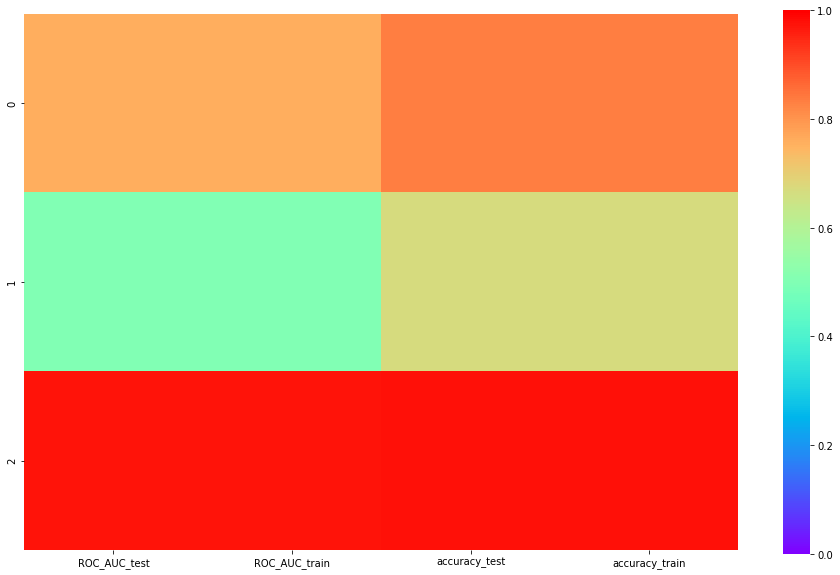

In [43]:
plt.figure(figsize=(16, 10))
seaborn.heatmap(classifiers_binary_math['report'].drop(columns=['estimator_name']), 
                vmin=0, vmax=1, square=True, cmap='rainbow')

plt.show()

#### Portugal/France

#### Here is similar situation, SVM have worst results and KNN with RandomForest give good results. But if we aggregate results from mathematical and portugal sets, we can see, that Random Forest is  better, then KNN.

In [56]:
classifiers_binary_port['report']

,ROC_AUC_test,ROC_AUC_train,accuracy_test,accuracy_train,estimator_name
0,1.000000,1.000000,1.000000,1.000000,KNeighborsClassifier
1,0.500000,0.500000,0.845917,0.845917,SVC
2,0.950446,0.950446,0.978428,0.978428,RandomForestClassifier


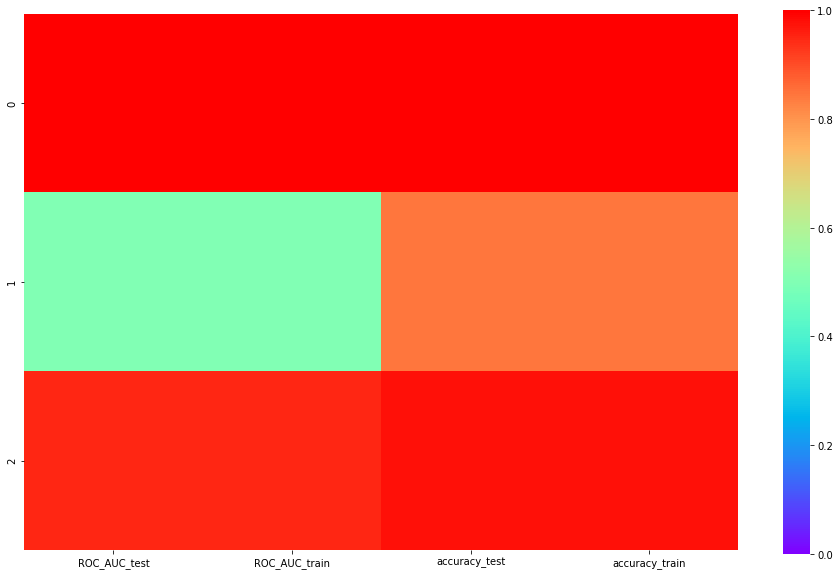

In [57]:
plt.figure(figsize=(16, 10))
seaborn.heatmap(classifiers_binary_port['report'].drop(columns=['estimator_name']), 
                vmin=0, vmax=1, square=True, cmap='rainbow')

plt.show()

#### In conclusion, we see, that the most suitable estimator are KNN and RandomForest for this case.

## Multiclass classification

### The five-level classification system

#### Math

#### This table contains f-scores for every class for every estimator which were used

In [58]:
classifiers_multi_math['report']

,fscore_KNeighborsClassifier,precision_KNeighborsClassifier,recall_KNeighborsClassifier,fscore_SVC,precision_SVC,recall_SVC,fscore_RandomForestClassifier,precision_RandomForestClassifier,recall_RandomForestClassifier
0,1.0,1.0,1.0,0.410463,0.258228,1.0,0.957346,0.926606,0.990196
1,1.0,1.0,1.0,0.000000,0.000000,0.0,0.915663,0.926829,0.904762
2,1.0,1.0,1.0,0.000000,0.000000,0.0,0.928105,0.946667,0.910256
3,1.0,1.0,1.0,0.000000,0.000000,0.0,0.964912,0.982143,0.948276
4,1.0,1.0,1.0,0.000000,0.000000,0.0,0.950495,0.923077,0.979592
5,1.0,1.0,1.0,0.000000,0.000000,0.0,0.933333,1.000000,0.875000


#### For my convenience, above table were transformed to heatmap, where we can see, that RandomForest and KNN have better results, than SVM, as it was in previous case 

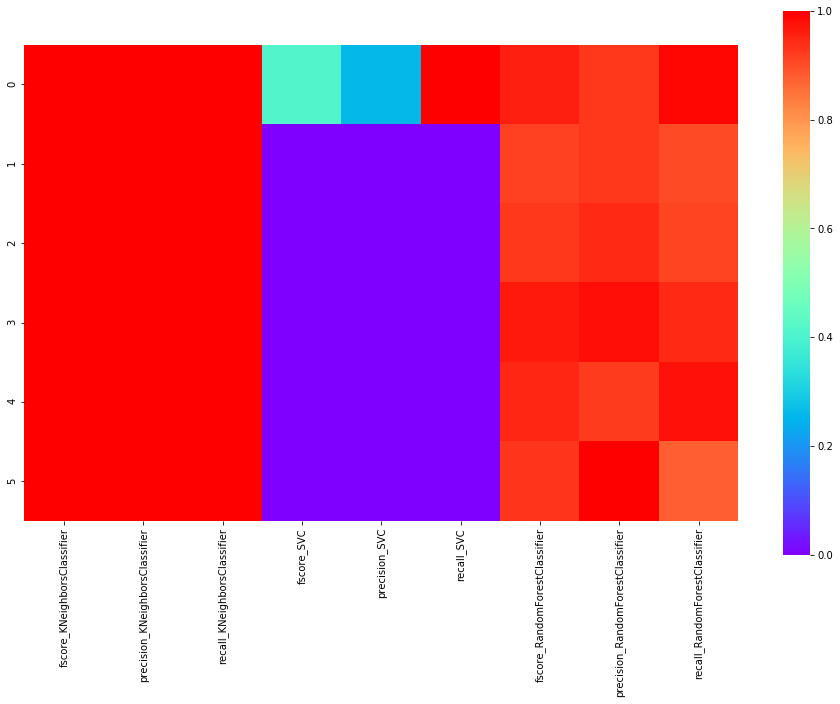

In [59]:
plt.figure(figsize=(16, 10))
seaborn.heatmap(classifiers_multi_math['report'], 
                vmin=0, vmax=1, square=True, cmap='rainbow')

plt.show()

#### Portugal/France

#### As it was in previous case, for our convenience, table was transformed to heatmap 

In [60]:
classifiers_multi_port['report']

,fscore_KNeighborsClassifier,precision_KNeighborsClassifier,recall_KNeighborsClassifier,fscore_SVC,precision_SVC,recall_SVC,fscore_RandomForestClassifier,precision_RandomForestClassifier,recall_RandomForestClassifier
0,1.0,1.0,1.0,0.000000,0.000000,0.0,0.984615,0.984615,0.984615
1,1.0,1.0,1.0,0.000000,0.000000,0.0,0.909091,0.909091,0.909091
2,1.0,1.0,1.0,0.426667,0.271186,1.0,0.864000,0.814070,0.920455
3,1.0,1.0,1.0,0.000000,0.000000,0.0,0.851064,0.875912,0.827586
4,1.0,1.0,1.0,0.000000,0.000000,0.0,0.886076,0.958904,0.823529
5,1.0,1.0,1.0,0.000000,0.000000,0.0,0.966292,1.000000,0.934783


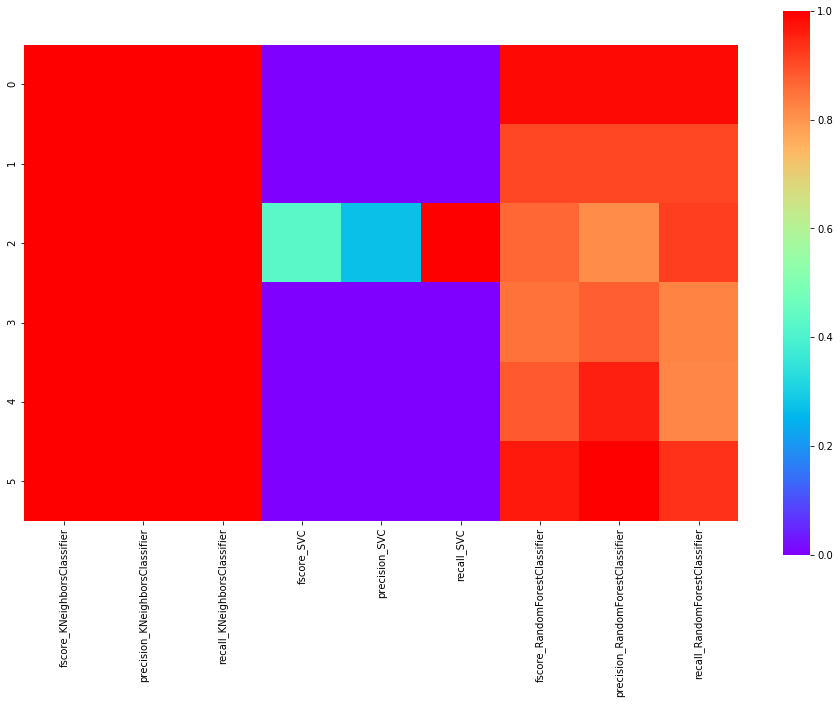

In [61]:
plt.figure(figsize=(16, 10))
seaborn.heatmap(classifiers_multi_port['report'], 
                vmin=0, vmax=1, square=True, cmap='rainbow')

plt.show()

#### In conclusion, in fact, that RandomForest and KNN have equal values of f-score, and we can choose anyone from them

# Regressions

## Grade predicting

### Math

#### For every estimator was held cross validation procedure 10 times and putted into table.

In [62]:
regressors_report_math['report']

,GradientBoostingRegressor,KNeighborsRegressor,LinearRegression,RandomForestRegressor
0,1.215473,0.018035,1.397010,4.612400
1,2.781657,0.021700,2.543616,6.040227
2,2.557037,0.018683,1.419477,5.212292
3,6.644343,0.039120,5.197653,20.746486
4,4.582124,0.022474,4.956944,10.601653
5,1.127799,0.019253,2.214927,4.440562
6,3.982167,0.026462,5.251344,11.641098
7,2.112562,0.018275,5.304360,9.663906
8,4.977164,0.015496,8.052871,11.710404
9,2.028541,0.023739,4.360010,8.834382


#### The greatest mean value has KNeighborsRegressor

In [63]:
regressors_report_math['report'].mean()

GradientBoostingRegressor    3.200887
KNeighborsRegressor          0.022324
LinearRegression             4.069821
RandomForestRegressor        9.350341
dtype: float64

#### As it was in classification problems, table with cross validation data was transformed to heatmap

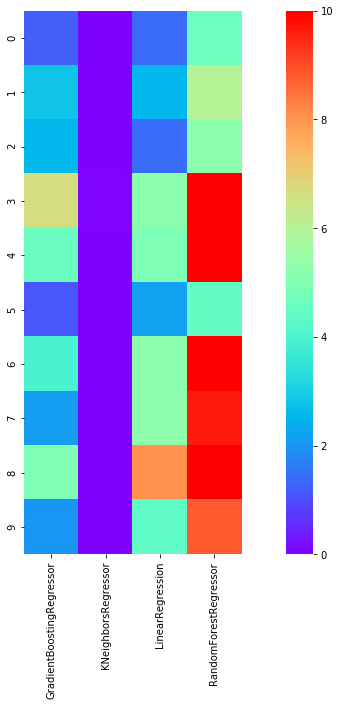

In [64]:
plt.figure(figsize=(16, 10))
seaborn.heatmap(regressors_report_math['report'], 
                vmin=0, vmax=10, square=True, cmap='rainbow')

plt.show()

### Portugal/France

#### Also as in the table above

In [65]:
regressors_report_port['report']

,GradientBoostingRegressor,KNeighborsRegressor,LinearRegression,RandomForestRegressor
0,1.895254,0.013844,1.302395,3.588510
1,0.512821,0.013895,0.499766,2.086245
2,4.189080,0.016939,3.442731,4.951828
3,0.749733,0.016262,0.551616,2.377969
4,1.192002,0.013645,1.133760,3.361965
5,1.829172,0.010677,1.241536,3.800255
6,1.039615,0.016512,0.650118,4.139304
7,2.263172,0.018406,1.856563,3.394452
8,1.763749,0.023710,1.575570,6.772066
9,5.082466,0.024012,5.518860,16.746062


In [66]:
regressors_report_port['report'].mean()

GradientBoostingRegressor    2.051707
KNeighborsRegressor          0.016790
LinearRegression             1.777291
RandomForestRegressor        5.121865
dtype: float64

#### In this case, KNeighborsRegressor has the best mean value score, therefore, we can think that RFR are suitable for regression task.

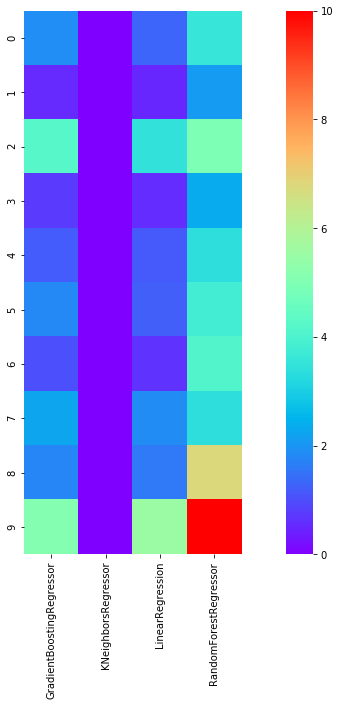

In [67]:
plt.figure(figsize=(16, 10))
seaborn.heatmap(regressors_report_port['report'], 
                vmin=0, vmax=10, square=True, cmap='rainbow')

plt.show()

# In conclusion, in this work was reviewed several estimators for each task and on the result data choosen the most suitables of them

# For classification task (Binary) - RandomForest or KNN
# For classification task (Multi) -  RandomForest or KNN
# For regression tasl - KNN regressor